In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os 
    
if not getattr(sys, "_src_path_added", False):
    src_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if src_path not in sys.path:
        sys.path.insert(0, src_path)
    sys._src_path_added = True 

In [2]:
from SGA.SGA import *
from SGA.SGAParts import *
from SGA.SGAInstance import *

from ProblemDef import FirefighterProblem
from Displayer import Displayer

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/home/jakub/.local/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


78
[0, 2, 3, 6, 7, 8, 9, 14, 15, 16, 21, 22, 27, 29, 39, 41, 42, 44, 45, 52, 55, 64, 66, 67, 69, 71, 75, 80, 86, 118]


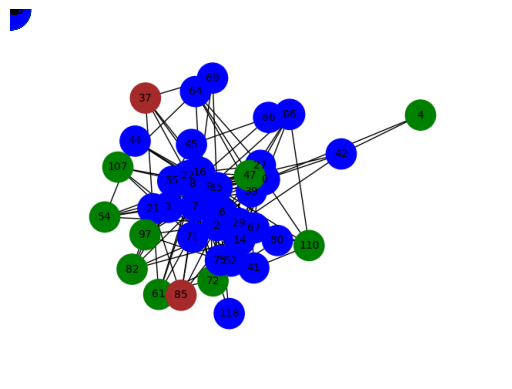

In [3]:
instance = SGAInstance("../problems/p11.json",
    populationInitializer= randomVertAndPathPI,
    populationSize = 200,
    generationsNumber = 1000,
    parentsSelector = rankingParentsSelector,
    crossover = basicCrossover,
    mutationProb = 0.7,
    mutator = neighbourMutator,
    fixer = basicFixer,
    evaluator = basicEvaluator)

firemans =SGA(instance)
disp = Displayer()
instance.problem.visualize_fire_without_burned(disp, firemans, output_path="gif11.gif")

In [4]:
instance._mutator = noMutator

res1 = []
N=20

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)

print("noMutator", statistics.fmean(res1))

instance._mutator = basicMutator

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)

print("basicMutator", statistics.fmean(res2))

instance._mutator = neighbourMutator

res3 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res3.append(burned)

print("neighbourMutator", statistics.fmean(res3))

instance._mutator = mixedMutator

res4 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res4.append(burned)

print("mixedMutator", statistics.fmean(res4))


85
[0, 3, 6, 7, 9, 14, 15, 16, 17, 18, 21, 22, 29, 31, 37, 38, 39, 41, 42, 49, 55, 68, 69, 71, 72, 78, 83, 92, 104, 109]
85
[0, 2, 5, 8, 9, 10, 14, 15, 16, 24, 26, 27, 29, 36, 42, 45, 47, 50, 52, 59, 72, 75, 77, 80, 86, 90, 92, 94, 101, 113]
85
[0, 1, 3, 5, 6, 7, 8, 10, 12, 13, 15, 16, 18, 20, 21, 29, 34, 36, 38, 42, 44, 51, 57, 62, 68, 70, 80, 91, 100, 111]
85
[0, 5, 7, 9, 10, 12, 13, 16, 17, 21, 23, 25, 26, 29, 31, 35, 36, 38, 40, 42, 47, 52, 53, 54, 68, 75, 81, 92, 96, 104]
85
[0, 2, 3, 6, 7, 8, 9, 15, 18, 22, 23, 25, 27, 29, 31, 38, 41, 42, 43, 47, 69, 72, 85, 86, 87, 88, 104, 111, 116, 118]
85
[0, 1, 3, 6, 9, 10, 11, 13, 16, 17, 22, 24, 25, 36, 38, 42, 45, 55, 57, 62, 65, 68, 77, 83, 84, 90, 94, 95, 105, 118]
85
[0, 1, 2, 5, 7, 8, 9, 16, 19, 22, 25, 26, 29, 36, 42, 43, 49, 60, 68, 72, 74, 75, 76, 80, 85, 90, 91, 94, 98, 99]
85
[0, 7, 9, 10, 15, 16, 17, 19, 23, 24, 25, 26, 31, 36, 38, 39, 42, 43, 55, 56, 60, 70, 71, 78, 79, 83, 88, 95, 108, 117]
85
[0, 5, 7, 10, 11, 12, 13, 16, 17,

In [5]:
print("noMutator", statistics.fmean(res1), " " ,min(res1))
print("basicMutator", statistics.fmean(res2)," " ,min(res2))
print("neighbourMutator", statistics.fmean(res3)," " ,min(res3))
print("mixedMutator", statistics.fmean(res4)," " ,min(res4))

noMutator 85.0   85
basicMutator 84.9   84
neighbourMutator 84.85   84
mixedMutator 84.9   84


In [6]:
instance._populationInitializer = basicPI

res1 = []
N=20

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)


instance._populationInitializer = randomVertAndPathPI

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)


instance._populationInitializer = randomVertAndDistrictPI

res3 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res3.append(burned)


86
[0, 2, 3, 8, 19, 22, 24, 27, 33, 36, 39, 42, 43, 44, 47, 50, 56, 60, 65, 67, 77, 78, 83, 84, 86, 88, 91, 92, 93, 115]
85
[0, 3, 6, 8, 10, 13, 16, 27, 34, 40, 42, 45, 48, 51, 54, 55, 59, 64, 65, 66, 73, 74, 76, 90, 95, 98, 104, 110, 113, 117]
85
[0, 3, 8, 9, 12, 13, 22, 23, 27, 31, 34, 35, 38, 41, 42, 43, 48, 59, 60, 65, 76, 80, 83, 84, 85, 87, 95, 102, 103, 119]
86
[0, 2, 9, 13, 14, 15, 17, 18, 21, 24, 29, 40, 42, 48, 55, 58, 59, 65, 68, 81, 93, 94, 97, 99, 104, 105, 109, 110, 114, 116]
85
[0, 17, 19, 25, 27, 31, 33, 39, 41, 42, 43, 44, 47, 53, 54, 55, 67, 70, 71, 75, 87, 95, 96, 98, 99, 103, 104, 105, 109, 117]
86
[0, 3, 7, 8, 10, 27, 33, 37, 41, 42, 43, 44, 52, 61, 62, 65, 66, 68, 69, 74, 76, 86, 93, 94, 100, 108, 113, 114, 117, 118]
85
[0, 1, 5, 7, 13, 15, 19, 20, 22, 27, 28, 33, 35, 42, 47, 48, 52, 56, 59, 61, 63, 66, 73, 76, 87, 94, 96, 103, 113, 114]
86
[0, 2, 6, 8, 10, 11, 33, 35, 38, 40, 41, 42, 45, 49, 54, 58, 59, 61, 65, 69, 73, 78, 88, 96, 98, 104, 105, 108, 111, 115]
85


In [7]:
print("basicPI", statistics.fmean(res1), " " ,min(res1))
print("randomVertAndPathPI", statistics.fmean(res2)," " ,min(res2))
print("randomVertAndDistrictPI", statistics.fmean(res3)," " ,min(res3))
instance._populationInitializer = basicPI

basicPI 85.55   85
randomVertAndPathPI 84.9   84
randomVertAndDistrictPI 85.25   84


In [8]:
instance._parentsSelector = basicParentsSelector

res1 = []
N=20

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)

instance._parentsSelector = rankingParentsSelector

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)

86
[0, 5, 7, 9, 10, 12, 14, 16, 24, 25, 27, 33, 35, 39, 41, 42, 43, 47, 48, 52, 55, 62, 66, 74, 75, 95, 101, 109, 112, 115]
85
[0, 11, 13, 19, 20, 22, 25, 27, 38, 40, 42, 43, 48, 53, 57, 62, 67, 71, 75, 80, 85, 94, 98, 99, 101, 105, 109, 116, 118, 119]
85
[0, 5, 10, 14, 26, 27, 29, 31, 33, 39, 40, 42, 44, 45, 47, 55, 56, 67, 71, 73, 76, 81, 83, 91, 92, 96, 100, 102, 110, 115]
86
[0, 8, 13, 25, 29, 34, 38, 39, 42, 43, 50, 53, 55, 59, 61, 64, 68, 72, 80, 85, 86, 87, 88, 93, 96, 98, 108, 109, 114, 117]
86
[0, 1, 8, 17, 19, 21, 26, 42, 44, 57, 59, 62, 63, 74, 75, 80, 84, 85, 87, 92, 101, 103, 106, 107, 110, 113, 115, 117, 118, 119]
86
[0, 8, 13, 18, 19, 21, 24, 25, 34, 35, 42, 53, 56, 66, 67, 72, 75, 76, 77, 78, 82, 85, 88, 96, 99, 100, 103, 109, 110, 113]
86
[0, 8, 12, 13, 18, 21, 24, 25, 29, 33, 34, 42, 44, 45, 47, 48, 54, 62, 67, 74, 77, 78, 96, 98, 100, 103, 106, 111, 112, 114]
86
[0, 6, 7, 9, 13, 14, 22, 29, 31, 38, 39, 42, 47, 51, 55, 62, 66, 68, 69, 77, 80, 89, 91, 97, 107, 111, 112

In [9]:
print("basicParentsSelector", statistics.fmean(res1), " " ,min(res1))
print("rankingParentsSelector", statistics.fmean(res2)," " ,min(res2))

basicParentsSelector 85.65   85
rankingParentsSelector 85.5   85
